### Netflix EDA
- 아래의 서비스에서 데이터를 수집하여 EDA를 수행하세요.


- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# MOVIES

In [ ]:
# 1.웹서비스 분석 : url

In [10]:
url = "https://flixpatrol.com/top10/netflix/world/2021/full"

In [ ]:
# 2.request(url) > response : html

In [11]:
response = requests.get(url)

In [12]:
response

<Response [200]>

> 정상적으로 받았다.

In [ ]:
# 3. html(str) > bs, css-selector > DF

In [13]:
# bs 객체 만들기
dom = BeautifulSoup(response.text, "html.parser")

In [107]:
elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")
len(elements)

176

In [59]:
element = elements[0]

In [60]:
element

<tr class="table-group">
<td class="table-td w-12 font-semibold text-right text-gray-500 table-hover:text-gray-400">1.</td>
<td class="table-td w-10">
<span class="inline-block align-bottom w-6 h-6 rounded-full text-blue-100 bg-blue-600 text-xxs leading-6 text-center">n/a</span>
</td>
<td class="table-td">
<a class="hover:underline" href="/title/red-notice/">Red Notice</a>
<span class="inline-block align-baseline w-3 h-3" title="This title is Netflix original">
<svg viewbox="0 0 512 512"><path d="M304 0h96v512h-96zM112 0h96v512h-96z" fill="#b20710"></path><path d="M400 512h-96L112 0h96z" fill="#e50914"></path></svg>
</span> </td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">25,918</td>
<td class="table-td w-18 text-right text-gray-500 table-hover:text-gray-400">–</td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">90</td>
<td class="table-td w-16 text-right text-gray-500 table-hover:text-gray-400">288</td>
<td class="table-td w-12 text-right text-g

> 자 여기서 랭크, 제목, (netflix original 인지 아닌지 넣으면 좋을듯) , point, countries, Days

In [106]:
data = {
    "rank": element.select_one(".table-td").text[:-1],
    "title" : element.select_one(".table-td:nth-child(3)").text.strip(),
    "points" : element.select_one(".table-td:nth-child(4)").text,
    "counries" : element.select_one(".table-td:nth-child(6)").text,
    "days" : element.select_one(".table-td:nth-child(8)").text,
    "isorigianl" : element.select_one(".table-td:nth-child(3) > span")
}
data

{'rank': '152',
 'title': 'Zero Chill',
 'points': '1,631',
 'counries': '49',
 'days': '20',
 'isorigianl': <span class="inline-block align-baseline w-3 h-3" title="This title is Netflix original">
 <svg viewbox="0 0 512 512"><path d="M304 0h96v512h-96zM112 0h96v512h-96z" fill="#b20710"></path><path d="M400 512h-96L112 0h96z" fill="#e50914"></path></svg>
 </span>}

In [108]:
datas = []
for element in elements : 
    datas.append({
        "rank": element.select_one(".table-td").text[:-1],
    "title" : element.select_one(".table-td:nth-child(3)").text.strip(),
    "points" : element.select_one(".table-td:nth-child(4)").text,
    "counries" : element.select_one(".table-td:nth-child(6)").text,
    "days" : element.select_one(".table-td:nth-child(8)").text,
    "isoriginal" : element.select_one(".table-td:nth-child(3) > span")
    })
top_movies = pd.DataFrame(datas)
top_movies.tail(3)

,rank,title,points,counries,days,isoriginal
173,174,Ava,186,4,29,None
174,175,Bombshell,181,2,14,None
175,176,Man on a Ledge,174,4,13,None


## isoriginal 범주형으로 바꾸기

In [109]:
import numpy as np

In [93]:
a = np.where(top_movies['isoriginal'].isna(), "No", "YES")

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'No', 'YES', 'YES', 'YES',
       'YES', 'No', 'YES', 'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'YES',
       'No', 'YES', 'YES', 'No', 'YES', 'YES', 'YES', 'YES', 'No', 'YES',
       'YES', 'No', 'YES', 'No', 'YES', 'No', 'No', 'YES', 'YES', 'No',
       'YES', 'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'YES', 'No', 'YES',
       'YES', 'No', 'YES', 'YES', 'No', 'YES', 'YES', 'No', 'YES', 'YES',
       'No', 'No', 'YES', 'YES', 'No', 'YES', 'No', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'No', 'YES', 'No', 'No', 'YES', 'YES',
       'YES', 'No', 'YES', 'No', 'No', 'No', 'YES', 'YES', 'YES', 'YES',
       'No', 'No', 'YES', 'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'No', 'YES', 'YES', 'No',
       'YES', 'YES', 'YES', 'No', 'YES', 'YES', 'YES', 'No', 'YES', 'No',
       'YES', 'No', 'No', 'YES', 'No', 'No'

In [110]:
top_movies['isoriginal'] = np.where(top_movies['isoriginal'].isna(), "No", "YES")

In [111]:
top_movies.head(3)

,rank,title,points,counries,days,isoriginal
0,1,Red Notice,"25,918",90,48,YES
1,2,We Can Be Heroes,"25,311",82,214,YES
2,3,Army of the Dead,"18,888",89,92,YES


In [112]:
top_movies.tail(3)

,rank,title,points,counries,days,isoriginal
173,174,Ava,186,4,29,No
174,175,Bombshell,181,2,14,No
175,176,Man on a Ledge,174,4,13,No


In [113]:
# 저장하기
top_movies.to_csv("top_movies.csv", index=False)

In [114]:
pd.read_csv("top_movies.csv")

,rank,title,points,counries,days,isoriginal
0,1,Red Notice,"25,918",90,48,YES
1,2,We Can Be Heroes,"25,311",82,214,YES
2,3,Army of the Dead,"18,888",89,92,YES
3,4,Wish Dragon,"16,953",82,88,YES
4,5,Army of Thieves,"15,081",90,52,YES
...,...,...,...,...,...,...
171,172,Scoob!,202,1,28,No
172,173,The Son of Bigfoot,192,7,8,No
173,174,Ava,186,4,29,No
174,175,Bombshell,181,2,14,No


## DRAMA

In [98]:
# 1. 웹서비스 분석
url = "https://flixpatrol.com/top10/netflix/world/2021/full"

In [99]:
# 2.request(url) > response : html
response = requests.get(url)
response

<Response [200]>

In [100]:
# 3. html(str) > bs, css-selector > DF
# bs 객체 만들기
dom = BeautifulSoup(response.text, "html.parser")

In [115]:
elements = dom.select("#netflix-2 > div.-mx-content > div > div > table > tbody > tr")
len(elements)

152

In [116]:
datas = []
for element in elements : 
    datas.append({
        "rank": element.select_one(".table-td").text[:-1],
    "title" : element.select_one(".table-td:nth-child(3)").text.strip(),
    "points" : element.select_one(".table-td:nth-child(4)").text,
    "counries" : element.select_one(".table-td:nth-child(6)").text,
    "days" : element.select_one(".table-td:nth-child(8)").text,
    "isoriginal" : element.select_one(".table-td:nth-child(3) > span")
    })
top_drama = pd.DataFrame(datas)
top_drama.head(3)

,rank,title,points,counries,days,isoriginal
0,1,Squid Game,"57,980",90,104,"[\n, [[], []], \n]"
1,2,Money Heist,"44,382",91,364,"[\n, [[], []], \n]"
2,3,Lupin,"42,690",83,256,"[\n, [[], []], \n]"


In [117]:
# isoriginal 수정
top_drama['isoriginal'] = np.where(top_drama['isoriginal'].isna(), "No", "YES")
top_drama.head(3)

,rank,title,points,counries,days,isoriginal
0,1,Squid Game,"57,980",90,104,YES
1,2,Money Heist,"44,382",91,364,YES
2,3,Lupin,"42,690",83,256,YES


In [118]:
# 저장하기 
top_drama.to_csv("top_drama.csv", index=False)

In [119]:
pd.read_csv("top_drama.csv")

,rank,title,points,counries,days,isoriginal
0,1,Squid Game,"57,980",90,104,YES
1,2,Money Heist,"44,382",91,364,YES
2,3,Lupin,"42,690",83,256,YES
3,4,Sex/Life,"34,609",82,141,YES
4,5,Bridgerton,"33,973",82,146,YES
...,...,...,...,...,...,...
147,148,Fatma,"1,680",44,47,YES
148,149,Sweet Home,"1,656",22,50,YES
149,150,Outlander,"1,642",22,104,No
150,151,Beauty and the Baker,"1,638",18,28,No


# kaggle 데이터 가져오기

In [120]:
kag = pd.read_csv("/Users/kimtaehyeong/크롤링프로젝트/netflix_titles.csv")
kag

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [146]:
kag['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [130]:
kag[kag['title'] == "Fatma"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,"April 27, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea..."


> 방 법 1  
일단 kag데이터를 순위 데이터에 붙혀서 어떤 유의 관계가 있는지를 설명. 근데 벌써부터 1위인 red notice 가 없어서 짜증남    
방 법 2    
수집한 데이터를 분석하는데 isoriginal 비율로 확인(너무 빈약..)     
방 법 3  
그냥 데이터 손실이 있더라도 랭크를 타겟으로 잡고 랭크 등급으로 바꿔서 분석을 하자. 그러기 위해선 inner merge가 좋을 듯




# top_mov + kag data(inner merge)

In [133]:
# inner merge 해봅시다.
top_kag_mov = pd.merge(top_movies, kag, on='title', how='inner')
top_kag_mov

,rank,title,points,counries,days,isoriginal,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2,We Can Be Heroes,"25,311",82,214,YES,s1495,Movie,Robert Rodriguez,"YaYa Gosselin, Pedro Pascal, Priyanka Chopra, ...",United States,"December 25, 2020",2020,PG,101 min,"Children & Family Movies, Comedies",When alien invaders capture Earth’s superheroe...
1,3,Army of the Dead,"18,888",89,92,YES,s854,Movie,Zack Snyder,"Dave Bautista, Ella Purnell, Omari Hardwick, G...",United States,"May 21, 2021",2021,R,148 min,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."
2,4,Wish Dragon,"16,953",82,88,YES,s740,Movie,Chris Appelhans,"Jimmy Wong, John Cho, Constance Wu, Will Yun L...","China, United States, Canada","June 11, 2021",2021,PG,102 min,"Children & Family Movies, Comedies",Determined teen Din is longing to reconnect wi...
3,6,The Mitchells vs. The Machines,"14,902",82,74,YES,s962,Movie,"Mike Rianda, Jeff Rowe","Danny McBride, Abbi Jacobson, Maya Rudolph, Mi...",NaN,"April 30, 2021",2021,PG,114 min,"Children & Family Movies, Comedies",A robot apocalypse put the brakes on their cro...
4,7,Fatherhood,"14,660",82,54,YES,s686,Movie,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,"June 18, 2021",2021,PG-13,111 min,Dramas,"A widowed new dad copes with doubts, fears, he..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,169,2012,"1,886",31,51,No,s1114,Movie,Roland Emmerich,"John Cusack, Amanda Peet, Chiwetel Ejiofor, Th...",United States,"April 1, 2021",2009,PG-13,158 min,"Action & Adventure, Sci-Fi & Fantasy",When a flood of natural disasters begins to de...
85,170,Wanted,"1,878",32,20,No,s633,Movie,Nibal Arakji,"Daad Rizk, Georges Diab, Sihame Haddad, George...",NaN,"June 28, 2021",2019,TV-14,90 min,"Comedies, International Movies",Four seniors embark on misadventures after bre...
86,171,Just Say Yes,"1,878",43,16,YES,s1110,Movie,"Appie Boudellah, Aram van de Rest","Yolanthe Cabau, Noortje Herlaar, Kim-Lian van ...",Netherlands,"April 2, 2021",2021,TV-MA,98 min,"Comedies, International Movies, Romantic Movies",Incurable romantic Lotte finds her life upende...
87,174,Ava,186,4,29,No,s1585,Movie,Tate Taylor,"Jessica Chastain, Colin Farrell, John Malkovic...",United States,"December 7, 2020",2020,R,97 min,"Action & Adventure, Dramas",An elite assassin wrestling with doubts about ...


# 영상 시청 등급이 뭔말인지 모르니 바꿔준다.

In [140]:
top_kag_mov['rating'] = top_kag_mov['rating'].replace({'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'})

In [141]:
top_kag_mov

,rank,title,points,counries,days,isoriginal,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2,We Can Be Heroes,"25,311",82,214,YES,s1495,Movie,Robert Rodriguez,"YaYa Gosselin, Pedro Pascal, Priyanka Chopra, ...",United States,"December 25, 2020",2020,Older Kids,101 min,"Children & Family Movies, Comedies",When alien invaders capture Earth’s superheroe...
1,3,Army of the Dead,"18,888",89,92,YES,s854,Movie,Zack Snyder,"Dave Bautista, Ella Purnell, Omari Hardwick, G...",United States,"May 21, 2021",2021,Adults,148 min,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."
2,4,Wish Dragon,"16,953",82,88,YES,s740,Movie,Chris Appelhans,"Jimmy Wong, John Cho, Constance Wu, Will Yun L...","China, United States, Canada","June 11, 2021",2021,Older Kids,102 min,"Children & Family Movies, Comedies",Determined teen Din is longing to reconnect wi...
3,6,The Mitchells vs. The Machines,"14,902",82,74,YES,s962,Movie,"Mike Rianda, Jeff Rowe","Danny McBride, Abbi Jacobson, Maya Rudolph, Mi...",NaN,"April 30, 2021",2021,Older Kids,114 min,"Children & Family Movies, Comedies",A robot apocalypse put the brakes on their cro...
4,7,Fatherhood,"14,660",82,54,YES,s686,Movie,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,"June 18, 2021",2021,Teens,111 min,Dramas,"A widowed new dad copes with doubts, fears, he..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,169,2012,"1,886",31,51,No,s1114,Movie,Roland Emmerich,"John Cusack, Amanda Peet, Chiwetel Ejiofor, Th...",United States,"April 1, 2021",2009,Teens,158 min,"Action & Adventure, Sci-Fi & Fantasy",When a flood of natural disasters begins to de...
85,170,Wanted,"1,878",32,20,No,s633,Movie,Nibal Arakji,"Daad Rizk, Georges Diab, Sihame Haddad, George...",NaN,"June 28, 2021",2019,Teens,90 min,"Comedies, International Movies",Four seniors embark on misadventures after bre...
86,171,Just Say Yes,"1,878",43,16,YES,s1110,Movie,"Appie Boudellah, Aram van de Rest","Yolanthe Cabau, Noortje Herlaar, Kim-Lian van ...",Netherlands,"April 2, 2021",2021,Adults,98 min,"Comedies, International Movies, Romantic Movies",Incurable romantic Lotte finds her life upende...
87,174,Ava,186,4,29,No,s1585,Movie,Tate Taylor,"Jessica Chastain, Colin Farrell, John Malkovic...",United States,"December 7, 2020",2020,Adults,97 min,"Action & Adventure, Dramas",An elite assassin wrestling with doubts about ...


In [142]:
# 팀원을 위해 csv 저장해 놓자.
top_kag_mov.to_csv("top_kag_mov.csv")

# top_dra + kag (inner merge)

In [132]:
# inner merge 해봅시다.
top_kag_dra = pd.merge(top_drama, kag, on='title', how='inner')
top_kag_dra

,rank,title,points,counries,days,isoriginal,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Squid Game,"57,980",90,104,YES,s34,TV Show,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...
1,3,Lupin,"42,690",83,256,YES,s735,TV Show,NaN,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...","France, United States","June 11, 2021",2021,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge..."
2,4,Sex/Life,"34,609",82,141,YES,s639,TV Show,NaN,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ...",United States,"June 25, 2021",2021,TV-MA,1 Season,"Romantic TV Shows, TV Dramas",A woman's daring sexual past collides with her...
3,5,Bridgerton,"33,973",82,146,YES,s1493,TV Show,NaN,"Adjoa Andoh, Julie Andrews, Lorraine Ashbourne...",United States,"December 25, 2020",2020,TV-MA,1 Season,"Romantic TV Shows, TV Dramas",The eight close-knit siblings of the Bridgerto...
4,7,Lucifer,"32,230",80,212,YES,s83,TV Show,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,145,Workin' Moms,"1,924",47,18,YES,s545,TV Show,NaN,"Catherine Reitman, Dani Kind, Juno Rinaldi, Je...",Canada,"July 6, 2021",2021,TV-MA,5 Seasons,"International TV Shows, TV Comedies",Maternity leave is over and it's time for thes...
97,147,Crash Landing on You,"1,891",9,180,YES,s3130,TV Show,NaN,"Hyun Bin, Son Ye-jin, Seo Ji-hye, Kim Jung-hyu...",South Korea,"December 15, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A paragliding mishap drops a South Korean heir...
98,148,Fatma,"1,680",44,47,YES,s973,TV Show,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,"April 27, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea..."
99,150,Outlander,"1,642",22,104,No,s1378,TV Show,NaN,"Caitriona Balfe, Sam Heughan, Tobias Menzies, ...",United States,"January 27, 2021",2018,TV-MA,4 Seasons,"Romantic TV Shows, TV Action & Adventure, TV D...",This epic tale adapted from Diana Gabaldon's p...


# 영상등급 이름을 바꾸자

In [143]:
top_kag_dra['rating'] = top_kag_dra['rating'].replace({'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'})
top_kag_dra

,rank,title,points,counries,days,isoriginal,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Squid Game,"57,980",90,104,YES,s34,TV Show,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,Adults,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...
1,3,Lupin,"42,690",83,256,YES,s735,TV Show,NaN,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...","France, United States","June 11, 2021",2021,Adults,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge..."
2,4,Sex/Life,"34,609",82,141,YES,s639,TV Show,NaN,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ...",United States,"June 25, 2021",2021,Adults,1 Season,"Romantic TV Shows, TV Dramas",A woman's daring sexual past collides with her...
3,5,Bridgerton,"33,973",82,146,YES,s1493,TV Show,NaN,"Adjoa Andoh, Julie Andrews, Lorraine Ashbourne...",United States,"December 25, 2020",2020,Adults,1 Season,"Romantic TV Shows, TV Dramas",The eight close-knit siblings of the Bridgerto...
4,7,Lucifer,"32,230",80,212,YES,s83,TV Show,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,Teens,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,145,Workin' Moms,"1,924",47,18,YES,s545,TV Show,NaN,"Catherine Reitman, Dani Kind, Juno Rinaldi, Je...",Canada,"July 6, 2021",2021,Adults,5 Seasons,"International TV Shows, TV Comedies",Maternity leave is over and it's time for thes...
97,147,Crash Landing on You,"1,891",9,180,YES,s3130,TV Show,NaN,"Hyun Bin, Son Ye-jin, Seo Ji-hye, Kim Jung-hyu...",South Korea,"December 15, 2019",2019,Teens,1 Season,"International TV Shows, Korean TV Shows, Roman...",A paragliding mishap drops a South Korean heir...
98,148,Fatma,"1,680",44,47,YES,s973,TV Show,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,"April 27, 2021",2021,Adults,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea..."
99,150,Outlander,"1,642",22,104,No,s1378,TV Show,NaN,"Caitriona Balfe, Sam Heughan, Tobias Menzies, ...",United States,"January 27, 2021",2018,Adults,4 Seasons,"Romantic TV Shows, TV Action & Adventure, TV D...",This epic tale adapted from Diana Gabaldon's p...


In [144]:
# 팀원을 위해 csv 저장해 놓자.
top_kag_dra.to_csv("top_kag_dra.csv")

In [153]:
top_kag_mov.isnull().sum()

rank             0
title            0
points           0
counries         0
days             0
isoriginal       0
show_id          0
type             0
director         1
cast             1
country         24
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [151]:
kag.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [171]:
top_kag_mov_th = top_kag_mov[['rank','title','points','counries','days','isoriginal','rating','duration']]

In [172]:
top_kag_mov_th['idx'] =top_kag_mov_th[] 

,rank,title,points,counries,days,isoriginal,rating,duration
0,2,We Can Be Heroes,"25,311",82,214,YES,Older Kids,101 min
1,3,Army of the Dead,"18,888",89,92,YES,Adults,148 min
2,4,Wish Dragon,"16,953",82,88,YES,Older Kids,102 min
3,6,The Mitchells vs. The Machines,"14,902",82,74,YES,Older Kids,114 min
4,7,Fatherhood,"14,660",82,54,YES,Teens,111 min
...,...,...,...,...,...,...,...,...
84,169,2012,"1,886",31,51,No,Teens,158 min
85,170,Wanted,"1,878",32,20,No,Teens,90 min
86,171,Just Say Yes,"1,878",43,16,YES,Adults,98 min
87,174,Ava,186,4,29,No,Adults,97 min


In [175]:
top_kag_mov_th.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        89 non-null     object
 1   title       89 non-null     object
 2   points      89 non-null     object
 3   counries    89 non-null     object
 4   days        89 non-null     object
 5   isoriginal  89 non-null     object
 6   rating      89 non-null     object
 7   duration    89 non-null     object
dtypes: object(8)
memory usage: 6.3+ KB


In [177]:
top_kag_mov_th = top_kag_mov_th.astype({'rank':int ,'counries':int,'days':int})

In [178]:
bin = [0,36,72,108,144,np.inf]
top_kag_mov_th['new_rank'] = pd.cut(top_kag_mov_th['rank'],bins=bin, labels=['A','B','C','D','E'], right=False)
top_kag_mov_th.head(5)

,rank,title,points,counries,days,isoriginal,rating,duration,new_rank
0,2,We Can Be Heroes,"25,311",82,214,YES,Older Kids,101 min,A
1,3,Army of the Dead,"18,888",89,92,YES,Adults,148 min,A
2,4,Wish Dragon,"16,953",82,88,YES,Older Kids,102 min,A
3,6,The Mitchells vs. The Machines,"14,902",82,74,YES,Older Kids,114 min,A
4,7,Fatherhood,"14,660",82,54,YES,Teens,111 min,A


In [179]:
top_kag_mov_th['new_rank'].value_counts()

A    21
C    20
B    17
D    16
E    15
Name: new_rank, dtype: int64

In [180]:
top_kag_mov_th.to_csv("topmov.csv")

In [181]:
top_kag_dra_th = top_kag_dra[['rank','title','points','counries','days','isoriginal','rating','duration']]

In [182]:
top_kag_dra_th = top_kag_dra_th.astype({'rank':int ,'counries':int,'days':int})

In [183]:
bin = [0,36,72,108,144,np.inf]
top_kag_dra_th['new_rank'] = pd.cut(top_kag_dra_th['rank'],bins=bin, labels=['A','B','C','D','E'], right=False)
top_kag_dra_th.head(5)

,rank,title,points,counries,days,isoriginal,rating,duration,new_rank
0,1,Squid Game,"57,980",90,104,YES,Adults,1 Season,A
1,3,Lupin,"42,690",83,256,YES,Adults,2 Seasons,A
2,4,Sex/Life,"34,609",82,141,YES,Adults,1 Season,A
3,5,Bridgerton,"33,973",82,146,YES,Adults,1 Season,A
4,7,Lucifer,"32,230",80,212,YES,Teens,6 Seasons,A


In [184]:
top_kag_dra_th['new_rank'].value_counts()

D    25
A    24
C    24
B    22
E     6
Name: new_rank, dtype: int64

In [185]:
top_kag_dra_th.to_csv("topdra.csv")

In [224]:
a

,rank,title,points,countries,total/country,days,total/day,total,year,imdb,show_id,type,director_y,country_y,rating,duration,listed_in,description_y
0,1,365 Days,42329,79,536,259,163,42329,2020,3.5,s2413,Movie,"Barbara Białowąs, Tomasz Mandes",Poland,Adults,114 min,"Dramas, International Movies, Romantic Movies",A fiery executive in a spiritless relationship...
1,2,Enola Holmes,16432,78,211,45,365,16432,2020,6.6,s1960,Movie,Harry Bradbeer,United Kingdom,Teens,124 min,"Action & Adventure, Children & Family Movies, ...","While searching for her missing mother, intrep..."
2,3,The Christmas Chronicles: Part Two,15916,80,199,36,442,15916,2020,6.0,s1652,Movie,Chris Columbus,Canada,Older Kids,115 min,"Children & Family Movies, Comedies","Unhappy over her mom’s new relationship, a now..."
3,4,Holidate,14849,80,186,64,232,14849,2020,6.3,s1786,Movie,John Whitesell,United States,Adults,105 min,"Comedies, Romantic Movies","Fed up with being single on holidays, two stra..."
4,5,The Old Guard,13918,75,186,133,105,13918,2020,6.6,s2251,Movie,Gina Prince-Bythewood,United States,Adults,126 min,Action & Adventure,Four undying warriors who've secretly protecte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,166,The Salisbury Poisonings,2,1,2,2,1,221,2022,7.2,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,In March 2018 Salisbury became the site of an ...
911,167,The Thundermans,2,1,2,2,1,102,2022,5.8,NaN,NaN,NaN,United States,NaN,NaN,NaN,"Meet The Thundermans, a typical suburban famil..."
912,168,Your Turn To Kill,2,1,2,2,1,3,2022,NaN,NaN,NaN,Nicolas Ahnert,NaN,NaN,NaN,NaN,Nana and Shota are a newlywed couple and Nana ...
913,170,Word Party Presents: Math!,1,1,1,1,1,2,2022,6.8,NaN,NaN,NaN,United States,NaN,NaN,NaN,"Count numbers,compare shapes and find patterns..."


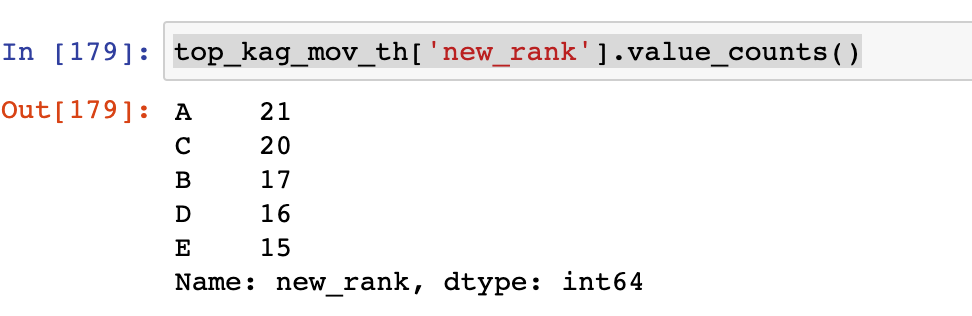
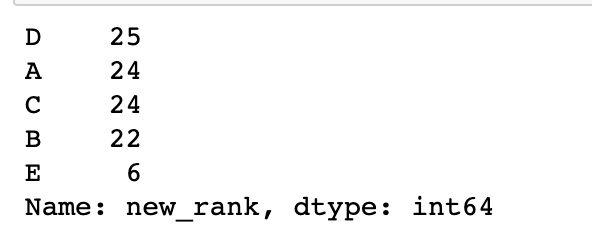

이거 duration 에 min 이랑 season 지워야 하고 등급 비율도 일정하게 할 수 있을텐데... 지금 시간이 어찌보면 촉박해서... 이렇게 했습니다. ㅠ

/opt/homebrew/Caskroom/miniforge/base/envs/tf26/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


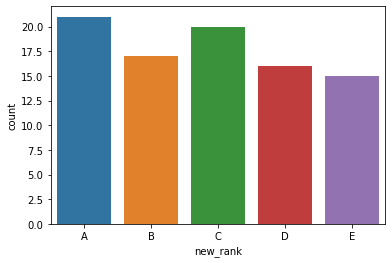

In [229]:
sns.countplot(top_kag_mov_th[target])
plt.show()

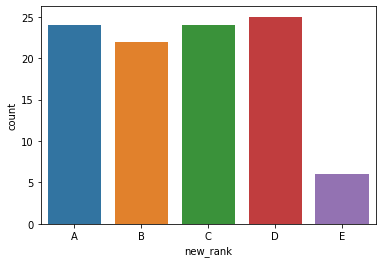

In [230]:
sns.countplot(top_kag_dra_th[target])
plt.show()

# 분석시작

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

In [225]:
target = "new_rank"

In [226]:
feature = "isoriginal"

In [231]:
top_kag_mov_th['isoriginal'] = np.where(top_kag_mov_th['isoriginal'] == 0, "no", "yes")

# No 0  YES 1

In [232]:
ct = pd.crosstab(top_kag_mov_th[feature],top_kag_mov_th[target], normalize='index')
ct

new_rank,A,B,C,D,E
isoriginal,,,,,
no,0.142857,0.095238,0.142857,0.095238,0.523810
yes,0.264706,0.220588,0.250000,0.205882,0.058824


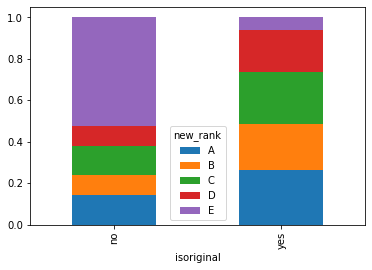

In [233]:
ct.plot.bar(stacked=True)
plt.show()

In [234]:
# 먼저 집계
table = pd.crosstab(top_kag_mov_th[target], top_kag_mov_th[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 isoriginal  no  yes
new_rank           
A            3   18
B            2   15
C            3   17
D            2   14
E           11    4
----------------------------------------------------------------------------------------------------
카이제곱통계량 24.82510200158495
p-value 5.4551786832215715e-05
자유도 4
기대빈도
 [[ 4.95505618 16.04494382]
 [ 4.01123596 12.98876404]
 [ 4.71910112 15.28089888]
 [ 3.7752809  12.2247191 ]
 [ 3.53932584 11.46067416]]


In [198]:
ct = pd.crosstab(top_kag_dra_th[feature],top_kag_dra_th[target], normalize='index')
ct

new_rank,A,B,C,D,E
isoriginal,,,,,
No,0.200000,0.066667,0.333333,0.333333,0.066667
YES,0.244186,0.244186,0.220930,0.232558,0.058140


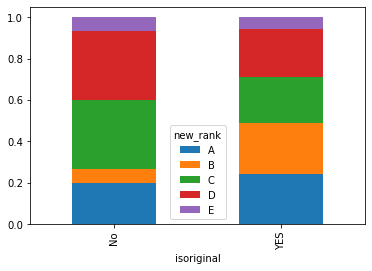

In [199]:
ct.plot.bar(stacked=True)
plt.show()

In [200]:
# 먼저 집계
table = pd.crosstab(top_kag_mov_th[target], top_kag_mov_th[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 isoriginal   0   1
new_rank          
A            3  18
B            2  15
C            3  17
D            2  14
E           11   4
----------------------------------------------------------------------------------------------------
카이제곱통계량 24.82510200158495
p-value 5.4551786832215715e-05
자유도 4
기대빈도
 [[ 4.95505618 16.04494382]
 [ 4.01123596 12.98876404]
 [ 4.71910112 15.28089888]
 [ 3.7752809  12.2247191 ]
 [ 3.53932584 11.46067416]]


> 표본이 적긴 하지만 대체로 시각화 결과로 볼때 netflix oirginal 일수록 랭크가 높게 측정되는 경향이 있다. 

In [211]:
feature = "rating"

In [215]:
ct = pd.crosstab(top_kag_mov_th[feature],top_kag_mov_th[target], normalize='index')
ct

new_rank,A,B,C,D,E
rating,,,,,
Adults,0.222222,0.244444,0.177778,0.200000,0.155556
Kids,0.000000,0.000000,1.000000,0.000000,0.000000
Older Kids,0.368421,0.105263,0.315789,0.105263,0.105263
Teens,0.166667,0.166667,0.208333,0.208333,0.250000


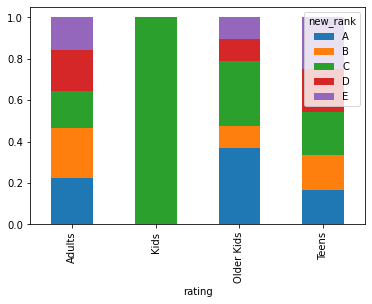

In [216]:
ct.plot.bar(stacked=True)
plt.show()

In [219]:
# 먼저 집계
table = pd.crosstab(top_kag_mov_th[target], top_kag_mov_th[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 rating    Adults  Kids  Older Kids  Teens
new_rank                                 
A             10     0           7      4
B             11     0           2      4
C              8     1           6      5
D              9     0           2      5
E              7     0           2      6
----------------------------------------------------------------------------------------------------
카이제곱통계량 10.27626976448474
p-value 0.5917376888056858
자유도 12
기대빈도
 [[10.61797753  0.23595506  4.48314607  5.66292135]
 [ 8.59550562  0.19101124  3.62921348  4.58426966]
 [10.11235955  0.2247191   4.26966292  5.39325843]
 [ 8.08988764  0.17977528  3.41573034  4.31460674]
 [ 7.58426966  0.16853933  3.20224719  4.04494382]]


In [212]:
ct = pd.crosstab(top_kag_dra_th[feature],top_kag_dra_th[target], normalize='index')
ct

new_rank,A,B,C,D,E
rating,,,,,
Adults,0.230769,0.200000,0.246154,0.261538,0.061538
Kids,0.000000,0.000000,0.333333,0.333333,0.333333
Older Kids,0.000000,0.250000,0.000000,0.750000,0.000000
Teens,0.310345,0.275862,0.241379,0.137931,0.034483


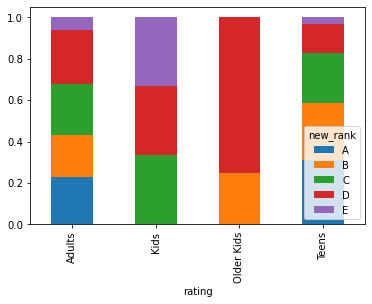

In [213]:
ct.plot.bar(stacked=True)
plt.show()

In [218]:
# 먼저 집계
table = pd.crosstab(top_kag_dra_th[target], top_kag_dra_th[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 rating    Adults  Kids  Older Kids  Teens
new_rank                                 
A             15     0           0      9
B             13     0           1      8
C             16     1           0      7
D             17     1           3      4
E              4     1           0      1
----------------------------------------------------------------------------------------------------
카이제곱통계량 14.588393671462637
p-value 0.26472107267260314
자유도 12
기대빈도
 [[15.44554455  0.71287129  0.95049505  6.89108911]
 [14.15841584  0.65346535  0.87128713  6.31683168]
 [15.44554455  0.71287129  0.95049505  6.89108911]
 [16.08910891  0.74257426  0.99009901  7.17821782]
 [ 3.86138614  0.17821782  0.23762376  1.72277228]]


In [210]:
top_kag_mov_th['duration'] = top_kag_mov_th['duration'][:-3]
top_kag_mov_th

,rank,title,points,counries,days,isoriginal,rating,duration,new_rank
0,2,We Can Be Heroes,"25,311",82,214,1,Older Kids,101 min,A
1,3,Army of the Dead,"18,888",89,92,1,Adults,148 min,A
2,4,Wish Dragon,"16,953",82,88,1,Older Kids,102 min,A
3,6,The Mitchells vs. The Machines,"14,902",82,74,1,Older Kids,114 min,A
4,7,Fatherhood,"14,660",82,54,1,Teens,111 min,A
...,...,...,...,...,...,...,...,...,...
84,169,2012,"1,886",31,51,0,Teens,158 min,E
85,170,Wanted,"1,878",32,20,0,Teens,NaN,E
86,171,Just Say Yes,"1,878",43,16,1,Adults,NaN,E
87,174,Ava,186,4,29,0,Adults,NaN,E


In [204]:
top_kag_mov_th.isna().sum()

rank          0
title         0
points        0
counries      0
days          0
isoriginal    0
rating        0
duration      4
new_rank      0
dtype: int64

In [221]:
a.isnull().sum()

rank               0
title              0
points             0
countries          0
total/country      0
days               0
total/day          0
total              0
year               0
imdb             127
show_id          483
type             483
director_y       304
country_y         32
rating           483
duration         483
listed_in        483
description_y      0
dtype: int64

In [223]:
a

,rank,title,points,countries,total/country,days,total/day,total,year,imdb,show_id,type,director_y,country_y,rating,duration,listed_in,description_y
0,1,365 Days,42329,79,536,259,163,42329,2020,3.5,s2413,Movie,"Barbara Białowąs, Tomasz Mandes",Poland,Adults,114 min,"Dramas, International Movies, Romantic Movies",A fiery executive in a spiritless relationship...
1,2,Enola Holmes,16432,78,211,45,365,16432,2020,6.6,s1960,Movie,Harry Bradbeer,United Kingdom,Teens,124 min,"Action & Adventure, Children & Family Movies, ...","While searching for her missing mother, intrep..."
2,3,The Christmas Chronicles: Part Two,15916,80,199,36,442,15916,2020,6.0,s1652,Movie,Chris Columbus,Canada,Older Kids,115 min,"Children & Family Movies, Comedies","Unhappy over her mom’s new relationship, a now..."
3,4,Holidate,14849,80,186,64,232,14849,2020,6.3,s1786,Movie,John Whitesell,United States,Adults,105 min,"Comedies, Romantic Movies","Fed up with being single on holidays, two stra..."
4,5,The Old Guard,13918,75,186,133,105,13918,2020,6.6,s2251,Movie,Gina Prince-Bythewood,United States,Adults,126 min,Action & Adventure,Four undying warriors who've secretly protecte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,166,The Salisbury Poisonings,2,1,2,2,1,221,2022,7.2,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,In March 2018 Salisbury became the site of an ...
911,167,The Thundermans,2,1,2,2,1,102,2022,5.8,NaN,NaN,NaN,United States,NaN,NaN,NaN,"Meet The Thundermans, a typical suburban famil..."
912,168,Your Turn To Kill,2,1,2,2,1,3,2022,NaN,NaN,NaN,Nicolas Ahnert,NaN,NaN,NaN,NaN,Nana and Shota are a newlywed couple and Nana ...
913,170,Word Party Presents: Math!,1,1,1,1,1,2,2022,6.8,NaN,NaN,NaN,United States,NaN,NaN,NaN,"Count numbers,compare shapes and find patterns..."


In [222]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           915 non-null    int64  
 1   title          915 non-null    object 
 2   points         915 non-null    int64  
 3   countries      915 non-null    int64  
 4   total/country  915 non-null    int64  
 5   days           915 non-null    int64  
 6   total/day      915 non-null    int64  
 7   total          915 non-null    int64  
 8   year           915 non-null    int64  
 9   imdb           788 non-null    float64
 10  show_id        432 non-null    object 
 11  type           432 non-null    object 
 12  director_y     611 non-null    object 
 13  country_y      883 non-null    object 
 14  rating         432 non-null    object 
 15  duration       432 non-null    object 
 16  listed_in      432 non-null    object 
 17  description_y  915 non-null    object 
dtypes: float64

# EXAMPLE

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

#### 컨텐츠 타입과 컨텐츠 등급별 컨텐츠의 비율

# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values, labels=movie_count.index, autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values, labels=tv_count.index, autopct="%1.1f%%")

plt.show()

결론 : 영화가 TV쇼 보다 청소년 관람불가 등급의 비율이 더 높고 TV가 영화보다 청소년관람등급의 컨텐츠의 비율이 더 높습니다.